## Import Packages

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as XGBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
SEED=1234
%matplotlib inline

def eval_display(y_test, y_pred):
    accuracy_s = accuracy_score(y_test, y_pred)
    precision_s = precision_score(y_test, y_pred, average='weighted')
    recall_s = recall_score(y_test, y_pred, average='weighted')
    f1_s = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred) 
    print("Accuracy Score:", accuracy_s)
    print("Precision Score:", precision_s)
    print("Recall Score:", recall_s)
    print("f1 Score:", f1_s)
    print('confusion_matrix is: \n', cm, '\n')
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, cmap='Blues')

## Q1

__Random forest (RF)__

From sklearn import the Breast Cancer dataset. Randomly split it into train/test with 70/30 ratio.  Using these data, train a Random Forest Classifier from the ensemble library of sklearn using 100 trees.  Then, report the following:

- (a)  The prediction values of the RF classifier on the test data (i.e., report 0’s and 1’s as class labels).
- (b)  Report the feature importance obtained from the trained RF and plot a histogram of them.

In [2]:
def breast_cancer_rf():
    ### data preparing
    cancer = load_breast_cancer()
    X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
    ### model building
    rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    ### evaluation displaying
    ### (a)
    truth_pred_pair = pd.DataFrame(
                            {'ground_truth': y_test,
                             'prediction': y_pred}
                            )
    eval_display(y_test=y_test, y_pred=y_pred)
    ### (b)
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    return truth_pred_pair, feature_importances

Accuracy Score: 0.9415204678362573
Precision Score: 0.9444399830825155
Recall Score: 0.9415204678362573
f1 Score: 0.9407070502536304
confusion_matrix is: 
 [[ 57   9]
 [  1 104]] 

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        66
           1       0.92      0.99      0.95       105

   micro avg       0.94      0.94      0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



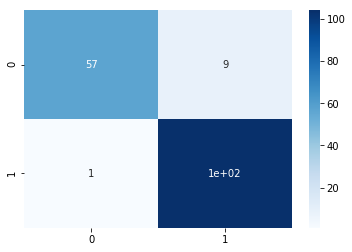

In [3]:
truth_pred_pair, feature_importances = breast_cancer_rf()

#### (a)


In [4]:
truth_pred_pair

,ground_truth,prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,1
7,1,1
8,0,0
9,0,0


#### (b)

In [5]:
feature_importances

,importance
worst perimeter,0.177405
worst concave points,0.119567
worst radius,0.112905
mean concave points,0.093847
worst area,0.076794
mean perimeter,0.069478
mean concavity,0.064593
mean radius,0.043419
mean area,0.035998
area error,0.028119


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6da5f37978>]],
      dtype=object)

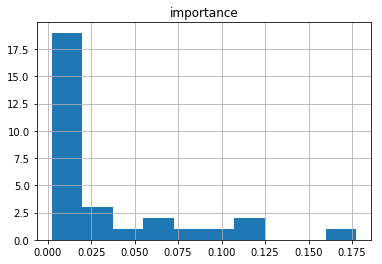

In [6]:
feature_importances.hist()

## Q2

__Regularized softmax linear classifiers__

Logistic regression is a well-known method for binary classification.  In order to extend logistic regression to the case of multi-class classification, one could use the __softmax__ function defined in slide #49 of the lecture slides  on  “probabilistic  models.” 

Additionally,  one  could  add  __regularizers__  (e.g.,  an L2  norm  to  obtain  sparse  solutions)  explained  in  slides  #32-38  of  the  same  lecture slides.  In this exercise, we are interested in implementing an L2 regularized softmax classifier.  After having your classifier implemented, train/test it with 70/30 ratio on the Iris dataset from sklearn (which has 3 class labels) and report the average accuracy obtained on the test data.

In [121]:
def lr_iris(model):
    ### data preparing
    iris = load_iris()
    X, y = pd.DataFrame(iris.data, columns=iris.feature_names), iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ### evaluation displaying
    eval_display(y_test=y_test, y_pred=y_pred)

### sklearn

Accuracy Score: 0.9777777777777777
Precision Score: 0.9794871794871796
Recall Score: 0.9777777777777777
f1 Score: 0.9778855218855219
confusion_matrix is: 
 [[16  0  0]
 [ 0 16  1]
 [ 0  0 12]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



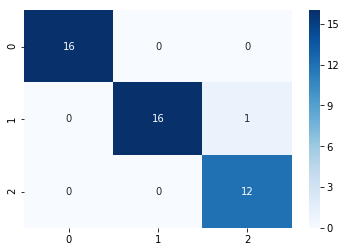

In [120]:
lr1 = LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=SEED)
lr_iris(lr1)

### No sklearn

In [168]:
class LogisticRegression2:
    def __init__(self, alpha, learning_rate, n_iterations):
        self.alpha = alpha 
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        
    def l2_reg(self, w):
        return self.alpha * (1 / 2) *  np.sum(w.T.dot(w))

    def l2_grad(self, w):
        return self.alpha * w

    def softmax(self, z):
        e_z = np.exp(z-np.max(z, axis=1,keepdims=True))
        return e_z / np.sum(e_z, axis=1, keepdims=True)

    def one_hot(self, y):
        one_hot_encoded_y = np.array(pd.get_dummies(y))
        return one_hot_encoded_y
    
    def cal_probas(self, X, w):
        z = np.dot(X, w) 
        y_probas = self.softmax(z) 
        return y_probas

    def cal_loss(self, X, y, w):
        m = X.shape[0]
        one_hot_encoded_y = self.one_hot(y)
        y_probas = self.cal_probas(X, w)
        loss = (-1 / m) * np.sum(one_hot_encoded_y * np.log(y_probas)) + self.l2_reg(w)
        return loss

    def cal_gradient(self, X, y, w):
        m = X.shape[0]
        one_hot_encoded_y = self.one_hot(y)
        y_probas = self.cal_probas(X, w)
        grad = (-1 / m) * np.dot(X.T,(one_hot_encoded_y - y_probas)) + self.l2_grad(w)
        return grad
    
    def fit(self, X, y):
        n_features = X.shape[1]
        np.random.seed(SEED)
        self.w = np.random.uniform(-0.1, 0.1, (n_features, len(np.unique(y))))
        losses = []
        for i in range(self.n_iterations):
            loss = self.cal_loss(X, y, self.w)
            grad = self.cal_gradient(X, y, self.w)
            losses.append(loss)
            self.w = self.w - (self.learning_rate * grad)
        plt.plot(losses)
        plt.title('Training loss')
        plt.show()

    def predict(self, X):
        X = np.array(X)
        probas = self.softmax(X.dot(self.w))
        return np.argmax(probas, axis=1)

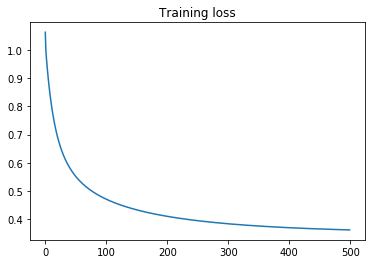

Accuracy Score: 0.9777777777777777
Precision Score: 0.9794871794871796
Recall Score: 0.9777777777777777
f1 Score: 0.9778855218855219
confusion_matrix is: 
 [[16  0  0]
 [ 0 16  1]
 [ 0  0 12]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



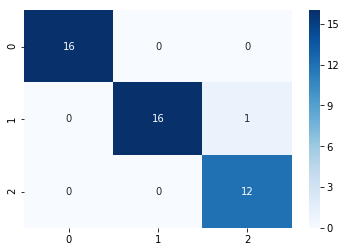

In [169]:
lr2 = LogisticRegression2(alpha=0.05, learning_rate=0.05, n_iterations=500)
lr_iris(lr2)